In [ ]:
pip install pyLDAvis==3.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136880 sha256=174cd4fbf8e2c5a91a396a9f8015007747c731d6a5d6d9c4b59c6acdd9e88f4a
  Stored in directory: /root/.cache/pip/wheels/e9/95/74/4766157910829d2fbc6b913850a62cfd15da77a199302cdf9c
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=2390b91da28038ce83e22413fbc7dc53616a4f911a6551c59ca1e2d77d12ff92
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built pyLDAvis sklearn


In [ ]:
pip install scikit-learn==0.24

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 38.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn: filename=scikit_learn-0.24.0-cp310-cp310-linux_x86_64.whl size=24897897 sha256=e50dbab45b8f463dbadaf3f5c754b6f53f063e7ea934e481097247b8beb87958
  Stored in directory: /root/.cache/pip/wheels/ae/58/c2/13fa991d6624a58064aeaf1b949900a3dcdb4ca046b75f19e8
Successfully built scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.1 requires scikit-learn>=1.0.2, but you have scikit-learn 0.24.0 which is incompatible.
yellowbr

# Glassdoor Company Review Analysis - Part 1 Data Cleaning & EDA

### Dataset
This dataset is about a large company's review on Glassdoor. We web scrapped the data from Glassdoor with its written permission. There are 6675 reviews with numerical ratings and text comments. To make this analysis general, the company name has been replaced with "Anonymous".

### Problem Statement
The goal of this analysis is to analyze anonymous employee reviews submitted on Glassdoor, with the hope to help employers gain real insights on their employee engagement. The analysis will answer these questions: what employees like and dislike about their company? Has the company’s reputation gotten better or worse in the recent year? Which job families have the highest and lowest satisfaction rates? What are the keywords that people say about this company? What can this company do to improve employee engagement?

### Introduction
This is part 1 of Glassdoor company review analysis project. In this part, we are going to extract categorical information from existing data, make unstructured data into structured data, clean data, and explore numerical data with visualization.

Surveys and open-ended feedback are among many of the data types and datasets that we may come into contact with as I/Os. Whether it's the open-ended section of an annual engagement survey, feedback from annual reviews, or customer feedback, the text that is provided is often difficult to do much with at scale. However, there are unsupervised machine learning methods that have provided us glimpses into how to make sense of this data. In the previous article I worked through how we might use LSA to accomplish the task of topic modeling along with a brief look at the data we'll be using today and a background on turning words into vectors. If you would like more detail on word vectorization or processing the data to be used by LDA I'd refer you to the article linked above.

In [ ]:
import sklearn

print(sklearn.__version__)

0.24.0


## Data Importing

First, necessary libraries are imported, and the dataset is read using pandas. Next, missing values are handled by filling in some missing values with default values or replacing them with a more appropriate value. Then, special characters, punctuation, and numbers are removed from the text. The text is then converted to lowercase, tokenized, and stop words are removed. After this, stemming and lemmatization are performed to normalize the text. Finally, sentiment analysis is performed on the text, and the sentiment score is categorized as positive, negative, or neutral. The distribution of sentiment scores for pros and cons is plotted using seaborn.

Overall, the code is cleaning and pre-processing the data in preparation for sentiment analysis, which is an important task for understanding employee satisfaction and opinions about a company.

Step 1. Gathering the Glassdoor data
First we need to collect the data that we want to analyze , which is the data we scrapped

In [ ]:
# Step 1: Import necessary libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_excel('reviewsVF.xls')

In [ ]:
df.head()

rating                                               pros  \
0     5.0  Diversity is a priority. Very innovative place...   
1     1.0  None, don't take this role if working for the ...   
2     2.0  Clients include some of the biggest names in f...   
3     2.0   They'll hire almost anyone, especially if you...   
4     5.0  Unlimited training, opportunities for upskilli...   

                                                cons          date  \
0                      None that are with mentioning   Apr 6, 2023   
1  I was working around the clock, expected to an...  May 17, 2023   
2  Sole focus on profit margin can reduce the qua...  May 18, 2023   
3   Performance is based on how many projects you...   Apr 3, 2023   
4  Large company which is sometimes difficult to ...  May 15, 2023   

   Work/Life Balance  Culture & Values  Diversity & Inclusion  \
0                5.0                 5                      0   
1                1.0                 0                      0   
2                1.0                 3                      0   
3                3.0                 3                      0   
4                5.0                 5                      0   

   Career Opportunities  Compensation and Benefits  Senior Management  \
0                     5                          4                  5   
1                     1                          1                  0   
2                     2                          5                  2   
3                     2                          3                  2   
4                     4                          5                  5   

   HOURSPERDAY  
0          8.0  
1          8.0  
2          8.0  
3          8.0  
4          8.0

In [ ]:
df.shape

(6430, 11)

In [ ]:
df.columns

Index(['rating', 'pros', 'cons', 'date', 'Work/Life Balance',
       'Culture & Values', 'Diversity & Inclusion', 'Career Opportunities',
       'Compensation and Benefits', 'Senior Management', 'HOURSPERDAY'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6430 entries, 0 to 6429
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   rating                     6430 non-null   float64
 1   pros                       6411 non-null   object 
 2   cons                       6427 non-null   object 
 3   date                       6430 non-null   object 
 4   Work/Life Balance          6367 non-null   float64
 5   Culture & Values           6430 non-null   int64  
 6   Diversity & Inclusion      6430 non-null   int64  
 7   Career Opportunities       6430 non-null   int64  
 8   Compensation and Benefits  6430 non-null   int64  
 9   Senior Management          6430 non-null   int64  
 10  HOURSPERDAY                6430 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 552.7+ KB


In [ ]:
df = df[['pros', 'cons']]

## 1. Data Cleaning

In [ ]:
print(df.isnull().sum())
#The output of this code shows that df has missing values in the ProfileName and Summary columns, with 4 and 3 missing values respectively. All other columns in df have no missing values. This information is useful for understanding the completeness of the data and for deciding how to handle missing values in subsequent analysis.

pros    19
cons     3
dtype: int64


### Strategy of Handling Missing Values
**Note:** There are 8 columns with missing values. These columns include numerical rating columns and categorical string columns. We could have filled the missing ratings with each column's median value, however, in order to make this analysis more accurate, our strategy is to **leave NaN numerical rating as is, and fill the missing categorical information with 'Unknown'**, so we can differentiate it from the originally existing data.

In [ ]:
# Step 2: Data cleaning and pre-processing

# Remove rows with missing values

# Remove special characters , punctuation and numbers
import re

df['pros'] = df['pros'].apply(lambda x: re.sub('[^a-zA-Z\s]', '', x) if isinstance(x, str) else x)
df['cons'] = df['cons'].apply(lambda x: re.sub('[^a-zA-Z\s]', '', x) if isinstance(x, str) else x)


# Convert all text to lowercase
df['pros'] = df['pros'].apply(lambda x: x.lower() if isinstance(x, str) else x)
df['cons'] = df['cons'].apply(lambda x: x.lower() if isinstance(x, str) else x)


<ipython-input-12-fa3f9dc1f28a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pros'] = df['pros'].apply(lambda x: re.sub('[^a-zA-Z\s]', '', x) if isinstance(x, str) else x)
<ipython-input-12-fa3f9dc1f28a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cons'] = df['cons'].apply(lambda x: re.sub('[^a-zA-Z\s]', '', x) if isinstance(x, str) else x)
<ipython-input-12-fa3f9dc1f28a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

## 2. Exploratory Data Analysis

#### Bar plots of overall ratings by employee type

In [ ]:
# Step 3: Tokenization
# Split text into individual words
df['pros'] = df['pros'].apply(lambda x: x.split() if isinstance(x, str) else [])
df['cons'] = df['cons'].apply(lambda x: x.split() if isinstance(x, str) else [])


<ipython-input-13-1accf4b1bd87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pros'] = df['pros'].apply(lambda x: x.split() if isinstance(x, str) else [])


In [ ]:
# Step 4: Removing stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    text = [word for word in text if word not in stop_words]
    return text

df['pros'] = df['pros'].apply(lambda x: remove_stopwords(x))
df['cons'] = df['cons'].apply(lambda x: remove_stopwords(x))

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Lemmatization** is a process where we convert words to its root word.

For example: ‘Studying’ becomes ‘Study’, ‘Meeting becomes ‘Meet’, ‘Better’ and ‘Best’ becomes ‘Good’.

The advantage of this is, we get to reduce the total number of unique words in the dictionary.

As a result, the number of columns in the document-word matrix (created by CountVectorizer in the next step) will be denser with lesser columns.

You can expect better topics to be generated

In [ ]:
# Step 5: Stemming or Lemmatization
# Perform stemming on the text
stemmer = PorterStemmer()

def stem_words(text):
    text = [stemmer.stem(word) for word in text]
    return text

df['pros'] = df['pros'].apply(lambda x: stem_words(x))
df['cons'] = df['cons'].apply(lambda x: stem_words(x))

# Perform lemmatization on the text
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    text = [lemmatizer.lemmatize(word) for word in text]
    return text

df['pros'] = df['pros'].apply(lambda x: lemmatize_words(x))
df['cons'] = df['cons'].apply(lambda x: lemmatize_words(x))

** Data Exploration:
What patterns are discovered from exploring the numerical rating data? **

**Sentiment Analysis : Analyze text data using TextBlob**

In [ ]:
import nltk
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import wordcloud

# Create lists of positive and negative terms
positive_terms = [
    "good",
    "like",
    "enjoy",
    "love",
    "great",
    "excellent",
    "fantastic",
    "wonderful",
    "recommend",
    "pros",
    "pro",
    "capgemini",
]
negative_terms = [
    "bad",
    "hate",
    "dislike",
    "awful",
    "terrible",
    "disgusting",
    "unpleasant",
    "cons",
    "con",
    "dont",
    "capgemini",
]

# Create word cloud text for pros
pros_text = ' '.join([word for sublist in df['pros'].tolist() for word in sublist if word not in positive_terms])

# Create word cloud text for cons
cons_text = ' '.join([word for sublist in df['cons'].tolist() for word in sublist if word not in negative_terms])

# Create word clouds
pros_wordcloud = wordcloud.WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(pros_text)
cons_wordcloud = wordcloud.WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(cons_text)

# Display word clouds
plt.figure(figsize=(15, 7))
plt.subplot(121)
plt.imshow(pros_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Pros Reviews', fontsize=20)

plt.subplot(122)
plt.imshow(cons_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud for Cons Reviews', fontsize=20)

plt.show()


**LDA TOPIC MODELING**

In [ ]:
import numpy as np
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore", category=PendingDeprecationWarning)
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction import _stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

**Word Vectorization**

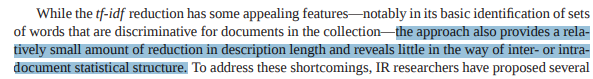

To help us with this we have what is known as Term Frequency Inverse Document Frequency or TF-IDF. The math behind this is fairly straight-forward. The TF is the # of times a term appears in a document divided by the total number of terms in the document and the IDF is calculated by taking the log(N/n) where N is the total number of documents and n is the number of documents the term in question is present in. You can see how this effectively makes common words less important and rare words more important. We'll walk through the same example above using TF-IDF and we will use scikit-learn's TfidfVectorizer.

1st we'll need to vectorize the responses. An outline of vectorization was discussed in the previous article, so I'd point readers to that article if review is needed.

In an effort to first replicate the SVD/LSA model from the first article we will use the tf-idf methodology for vectorizing our responses, but Blei, et al. (2003) explicitly mention in their paper that tf-idf may not be necessary for the LDA method given the probabilistic nature of the model, so we will compare the results from the tf-idf LDA to those extracted from a count vectorizer methodology as well.

In [ ]:
df['cons'] = df['cons'].astype(str)


vectorizer = TfidfVectorizer(stop_words='english') #Converting text into numerical representation
vectors = vectorizer.fit_transform(df['cons']).todense()
vectors.shape

(6430, 4047)

In [ ]:
vocab = np.array(vectorizer.get_feature_names())

In [ ]:
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import GridSearchCV

The most important tuning parameter for LDA models is n_components (number of topics). In addition, I am going to search learning_decay (which controls the learning rate) as well.

Besides these, other possible search params could be learning_offset (downweigh early iterations. Should be > 1) and max_iter. These could be worth experimenting if you have enough computing resources.

Be warned, the grid search constructs multiple LDA models for all possible combinations of param values in the param_grid dict. So, this process can consume a lot of time and resources.

In [ ]:
import numpy as np

# Convert vectors to numpy array
vectors = np.asarray(vectors)

# Define Search Param
search_params = {'n_components': [6,8,10], 'learning_decay': [0.5, 0.7,0.9]}

# Initialize the Model
lda = LDA()

# Initialize Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Perform Grid Search
model.fit(vectors)


GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [6, 8, 10]})

A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good. Let’s check for our model.

In [ ]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(vectors))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 6}
Best Log Likelihood Score:  -34881.277545742356
Model Perplexity:  3900.1656757655237


In [ ]:
# Get Log Likelyhoods from Grid Search
n_topics = [2,4,6]
log_likelihoods_5 = [round(score) for params, score in zip(model.cv_results_['params'], model.cv_results_['mean_test_score']) if params['learning_decay'] == 0.5]
log_likelihoods_7 = [round(score) for params, score in zip(model.cv_results_['params'], model.cv_results_['mean_test_score']) if params['learning_decay'] == 0.7]
log_likelihoods_9 = [round(score) for params, score in zip(model.cv_results_['params'], model.cv_results_['mean_test_score']) if params['learning_decay'] == 0.9]

# Plot Topics by Log Likelihood
plt.figure(figsize=(10, 6))
plt.plot(n_topics, log_likelihoods_5, label='0.5')
plt.plot(n_topics, log_likelihoods_7, label='0.7')
plt.plot(n_topics, log_likelihoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best');

13. Compare LDA Model Performance Scores
Plotting the log-likelihood scores against num_topics, clearly shows number of topics = 10 has better scores. And learning_decay of 0.7 outperforms both 0.5 and 0.9.

This makes me think, even though we know that the dataset has 20 distinct topics to start with, some topics could share common keywords.
For example, ‘alt.atheism’ and ‘soc.religion.christian’ can have a lot of common words. Same with ‘rec.motorcycles’ and ‘rec.autos’, ‘comp.sys.ibm.pc.hardware’ and ‘comp.sys.mac.hardware’, you get the idea.

To tune this even further, you can do a finer grid search for number of topics between 10 and 15. But I am going to skip that for now.

So the bottom line is, a lower optimal number of distinct topics (even 10 topics) may be reasonable for this dataset.

I don’t know that yet.

But LDA says so.

Let’s see.

We can see above that the best learning decay was 0.9 and the ideal number of topics was 6, so we'll go with that (unlike the 10 we used in SVD), but we'll stick with the top 8 words like we did with SVD.

**Building the model**

In [ ]:
# Tweak the two parameters below
number_topics = 6
number_words = 8

In [ ]:
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1, learning_decay=0.9)
%time
vectors = np.asarray(vectors)

lda.fit(vectors)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


LatentDirichletAllocation(learning_decay=0.9, n_components=6, n_jobs=-1)

In [ ]:
# Helper function
def print_topics(model,n_top_words):
    words = vocab
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [ ]:
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, number_words)

Topics found via LDA:

Topic #0:
work project cultur peopl stress sometim month time

Topic #1:
hike salari project le growth slow work compani

Topic #2:
compani good noth say capgemini bad work project

Topic #3:
organ busi manag downsid work neg capgemini compani

Topic #4:
think time pay work long manag improv standard

Topic #5:
work noth life balanc le salari manag better


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Assuming 'df' is your DataFrame and 'df['cons']' contains the text data

# Convert text data to numerical representation using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(df['cons'])

# Perform dimensionality reduction using TruncatedSVD
svd = TruncatedSVD(n_components=6)
lsa = svd.fit_transform(vectors)

# Define the topic names and document names
topicnames = ["Topic" + str(i) for i in range(6)]  # Replace 6 with the desired number of topics
docnames = ["Doc" + str(i) for i in range(lsa.shape[0])]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(data=lsa, columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = df_document_topic.idxmax(axis=1)


# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

In [ ]:
# Add the 'dominant_topic' column to df_document_topic
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic

Topic0    Topic1    Topic2    Topic3    Topic4    Topic5  \
Doc0     0.006847 -0.006564  0.027181  0.003904 -0.016063 -0.001756   
Doc1     0.067323 -0.051266 -0.012507  0.008381 -0.009745 -0.008541   
Doc2     0.147356 -0.090901 -0.043156 -0.064782 -0.028288 -0.043956   
Doc3     0.226312 -0.102894 -0.032222 -0.144131 -0.058330 -0.140127   
Doc4     0.139976 -0.080429  0.015833 -0.151175 -0.014313  0.243482   
...           ...       ...       ...       ...       ...       ...   
Doc6425  0.062738 -0.034886  0.040912 -0.044008 -0.028735  0.038587   
Doc6426  0.054635 -0.026034 -0.007958 -0.031715 -0.012345 -0.011993   
Doc6427  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Doc6428  0.022542 -0.010032 -0.002522 -0.026473 -0.013483 -0.007288   
Doc6429  0.045729 -0.016602 -0.006743 -0.044809 -0.019396  0.001636   

        dominant_topic  
Doc0            Topic2  
Doc1            Topic0  
Doc2            Topic0  
Doc3            Topic0  
Doc4            Topic5  
...                ...  
Doc6425         Topic0  
Doc6426         Topic0  
Doc6427         Topic0  
Doc6428         Topic0  
Doc6429         Topic0  

[6430 rows x 7 columns]

**Topic #0:** Good work-life balance, salary hike, project management

**Topic #1:** Communication issues, time management, workbench, client interaction

**Topic #2:** Work management, company culture, project handling, compensation, people growth, consulting

**Topic #3:** Thoughts on the company, suggestions for improvement, slow growth, consulting

**Topic #4:** Long working hours, organizational aspects, frequent travel, company-related aspects

**Topic #5:** Salary, low pay, increment, comparison with the market

**Parameters for LDA model in sklearn**

The arguments used in the sklearn package are:

The corpus or the document-term matrix to be passed to the model (in our example is called doc_term_matrix)
Number of Topics: n_components is the number of topics to find from the corpus.
The number of maximum iterations: max_iter: It is the number of maximum iterations allowed for the LDA algorithm to converge

**15. Review topics distribution across documents**

In [ ]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

Topic Num  Num Documents
0    Topic0           4695
1    Topic1            516
2    Topic2            424
3    Topic5            399
4    Topic4            244
5    Topic3            152

**Predicting A specific response**

Let's look at which topics LDA distributes the final two responses under.



In [ ]:
print(df['cons'][4000])
print("-----------")
print(df['cons'][4001])

['le', 'salari', 'increment', 'employe']
-----------
['there', 'littl', 'career', 'progress', 'capgemini', 'long', 'current', 'skill', 'demand', 'fine', 'dont', 'expect', 'capgemini', 'crosstrain', 'crosshir', 'salari', 'arent', 'good', 'consult', 'firm', 'offer']


In [ ]:
lda.transform(vectors[-2:])

array([[0.05212117, 0.05213502, 0.73295278, 0.05686698, 0.05363971,
        0.05228434],
       [0.04281676, 0.04281608, 0.55744768, 0.04240337, 0.2718506 ,
        0.04266552]])

So, according to the LDA model the first comment we see above falls mostly into topic 3 and the second comment falls mostly into topic 1. This could be an interesting topic of exploration to see if human labelers would agree with this.

**17. How to see the Topic’s keywords?**

The weights of each keyword in each topic is contained in lda_model.components_ as a 2d array.

The names of the keywords itself can be obtained from vectorizer object using get_feature_names().

Let’s use this info to construct a weight matri

In [ ]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(lda.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
# df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

aa      aasd   abandon      abil       abl    aboard    abrupt  \
0  0.166675  0.166669  0.166669  0.170174  0.167041  0.166671  0.166670   
1  1.122601  0.166667  0.166668  0.168362  2.191342  0.166668  0.166668   
2  0.166672  0.166668  0.669184  1.065540  5.576647  0.166669  1.117492   
3  0.166674  0.802321  0.166669  1.508519  0.166920  0.169196  0.166669   
4  0.166671  0.166668  0.166668  0.803681  2.235394  0.166669  0.166668   

   abruptli    absent   absolut  ...    youpay      youv       yoy        yp  \
0  0.166670  0.352583  0.167440  ...  0.166674  0.166673  0.166676  0.166671   
1  0.166668  0.167367  2.080200  ...  0.469745  0.871747  0.168645  0.166668   
2  0.403476  0.166669  1.324406  ...  0.166671  2.578159  0.166672  0.166669   
3  0.166669  0.166669  1.948724  ...  0.166672  0.166730  0.729724  0.166670   
4  0.168093  0.166668  0.426381  ...  0.168314  0.169197  0.166671  1.063794   

         yr    yuvraj      zero  zeroclar      zone     zulki  
0  0.166728  0.166677  0.166744  0.166669  0.166676  0.166670  
1  0.736770  0.166672  2.173935  0.166668  0.166671  0.168061  
2  0.408376  0.234005  0.599193  0.166668  1.696009  0.534345  
3  0.166675  0.166675  0.166776  0.854311  0.166674  0.166669  
4  0.169134  0.172700  1.354089  0.166668  2.362375  0.166668  

[5 rows x 4047 columns]

**18. Get the top 15 keywords each topic**

From the above output, I want to see the top 15 keywords that are representative of the topic.

The show_topics() defined below creates that.

In [ ]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

Word 0     Word 1   Word 2   Word 3    Word 4     Word 5   Word 6  \
Topic 0     noth       dont      say  everyth      good      manag     work   
Topic 1     work     balanc     life     good     manag    compani  apprais   
Topic 2   salari       hike       le      low    growth  increment      pay   
Topic 3    organ  difficult    manag    chang   project   structur  compani   
Topic 4  compani    project     work     need  competit       hard    manag   
Topic 5    think   standard  fresher     long   project   industri     hour   

          Word 7   Word 8     Word 9  Word 10  Word 11 Word 12    Word 13  \
Topic 0      far      bad       issu  compani    anyth    like  capgemini   
Topic 1  project  employe  capgemini     hour   depend   great     client   
Topic 2     good     time     compar   better  compens    slow    benefit   
Topic 3     larg     lack       need   travel   client  promot     career   
Topic 4     time      big    sometim  employe      lot  growth    consult   
Topic 5      pay     work    mention   market      lot   manag       time   

          Word 14  
Topic 0       neg  
Topic 1    experi  
Topic 2      work  
Topic 3   support  
Topic 4  opportun  
Topic 5      need

Source : https://stackoverflow.com/questions/60613532/how-do-i-calculate-the-coherence-score-of-an-sklearn-lda-model

In [ ]:
from gensim.models import CoherenceModel
import gensim.corpora as corpora

def get_Cv(model, df_columnm):
  topics = model.components_

  n_top_words = 20
  texts = [[word for word in doc.split()] for doc in df_columnm]

  # create the dictionary
  dictionary = corpora.Dictionary(texts)
  # Create a gensim dictionary from the word count matrix

  # Create a gensim corpus from the word count matrix
  corpus = [dictionary.doc2bow(text) for text in texts]

  feature_names = [dictionary[i] for i in range(len(dictionary))]

  # Get the top words for each topic from the components_ attribute
  top_words = []
  for topic in topics:
      top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

  coherence_model = CoherenceModel(topics=top_words, texts=texts, dictionary=dictionary, coherence='c_v')
  coherence = coherence_model.get_coherence()
  return coherence

In [ ]:
coherence = get_Cv(lda, df['cons'])  # Replace `df['cons']` with your actual column
print(f"Coherence Score: {coherence}")

Coherence Score: 0.7562794523493902


The coherence score ranges from 0 to 1, with higher values indicating better coherence. Typically, a coherence score above 0.6 or 0.7 is considered good

**19. How to predict the topics for a new piece of text?**

Assuming that you have already built the topic model, you need to take the text through the same routine of transformations and before prediction the topic

The order of transformations is :

sent_to_words() –> lemmatization() –> vectorizer.transform() –> best_lda_model.transform()

You need to apply these transformations in the same order. So to simplify it, let’s combine these steps into a predict_topic()

In [ ]:
import spacy
# Define function to predict topic for a given text document.
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization

    # Step 1: Clean with simple_preprocess
    mytext_2 = df['cons']

    # Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    # Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)

    # Step 4: LDA Transform
    topic_probability_scores = lda.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores

# Predict the topic
mytext = ["I didn't like the salary. The work conditions are very tough. My boss is very harsh with me. He's very rude and he always overloads me with huge work. My colleagues are not very nice with me."]
topic, prob_scores = predict_topic(text = mytext)
print(topic)

['noth', 'dont', 'say', 'everyth', 'good', 'manag', 'work', 'far', 'bad', 'issu', 'compani', 'anyth', 'like', 'capgemini', 'neg']


In [ ]:
# Example unseen document
unseen_document = 'Bad work-life balance'

# Preprocess the unseen document using the same preprocessing steps

# Convert the preprocessed unseen document into a document-term matrix
unseen_dtm = vectorizer.transform([unseen_document])

# Predict the topic distribution of the unseen document
topic_distribution = lda.transform(unseen_dtm)

# Identify the dominant topic based on the predicted topic distribution
dominant_topic = topic_distribution.argmax(axis=1)[0]

print(f'Dominant Topic: {dominant_topic}')

Dominant Topic: 5


**Data Visualization**


One thing we did not focus on with LSA is visualizing the topics. One interesting way to visualize unsupervised learning data is to use another data reduction technique known as t-distributed stochastic neighbor embedding or T-SNE. There is a fun package that I recently discovered that leverages tsne to make interactive visualizations called PyLDAvis. It takes as input the model, your vectors, the vectorizer you want to use and the multi-dimensional scaling technique you want to use, in our case we will be using tsne.

You can hover over each of the topic bubbles and the top-30 most relevant words will change to reflect the topic. Feel free to give it a try :)

The pyLDAvis offers the best visualization to view the topics-keywords distribution.

A good topic model will have non-overlapping, fairly big sized blobs for each topic

In [ ]:
import pyLDAvis
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
import pyLDAvis.sklearn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, vectors, vectorizer)
pyLDAvis.display(panel)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


As you can see these topics line up perfectly with the topics identified above, and the 1 topic is identical to Topic 4 shown above. However, what immediately stands out is that, while we have 6 distinct topics about 70% of the words used in the responses fall into topic 1, with the remaining 5-6% pretty equally distributed among the other 5 topics. In my experience this is fairly typical, where there is generally one large topic that accounts for 50-60% of the responses and the remaining topics are actually pretty distinct, but account for much less of the overall responses. We'll likely see this again when we do K-means clustering on this same dataset in the next article.

But.... PyLDAvis is a great interactive way to visualize your topics. As you hover over each of the topic bubbles you can see the top 30 most relevant terms as well as the estimated term frequency within each topic (which gives you an idea of the actual vs. expected.

**Countvectorizer (Document Term Matrix
)**

There is conflicting research on whether or not one should use tf-idf or counts for LDA. As mentioned above the authors of LDA hint at tf-idf not being necessary due to the probabilistic nature of LDA, but others have found through research that tf-idf enhances the interpretability of topics, so I figured we'd just try both and compare :)

ou can create one using CountVectorizer. In the below code, I have configured the CountVectorizer to consider words that has occurred at least 10 times (min_df), remove built-in english stopwords, convert all words to lowercase, and a word can contain numbers and alphabets of at least length 3 in order to be qualified as a word.

So, to create the doc-word matrix, you need to first initialise the CountVectorizer class with the required configuration and then apply fit_transform to actually create the matrix.

Since most cells contain zeros, the result will be in the form of a sparse matrix to save memory.

If you want to materialize it in a 2D array format, call the todense() method of the sparse matrix like its done in the next step

A document-term matrix is a mathematical matrix that indicates the frequency of terms that appear in a set of documents. In a document-term matrix, columns represent terms in the collection and rows represent documents in the collection. This matrix is an example of a document-feature matrix, where “features” can relate to more than just terms in a document.

Another frequent format is the transposition, or term-document matrix, where terms are the rows and documents are the columns. The fundamental concept behind a document term matrix is that text documents can be represented as points in Euclidean space, also known as vectors.

Let’s try to understand this concept by an example,

Implementation
Implementation

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(df['cons']).todense()
vectors.shape

(6430, 4047)

Here, using Scikit-Learn, we’ve defined the four documents we’ve been analyzing as four strings in a list. The count vectorizer model may be used to generate the document term matrix. As you can see, we imported the count vectorizer from the Scikit-Learn feature extraction dot text module.

After creating the count vectorizer, we fit and then convert our body into a collection of words. When we use the phrase “bag of words” in natural language processing, we’re referring to the most basic application of a document term matrix.

In [ ]:
# Tweak the two parameters below
number_topics = 6
number_words = 8

In [ ]:
vocab = np.array(vectorizer.get_feature_names())
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [ ]:
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1, learning_decay=0.9)
lda.fit(vectors)

LatentDirichletAllocation(learning_decay=0.9, n_components=6, n_jobs=-1)

In [ ]:
# Helper function
def print_topics(model,n_top_words):
    words = vocab
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, number_words)

Topics found via LDA:

Topic #0:
compani project consult work time manag client bench

Topic #1:
employe need manag leadership dont organ compani think

Topic #2:
project manag peopl good work capgemini lot client

Topic #3:
work balanc hour life manag project time long

Topic #4:
salari le hike noth pay low good growth

Topic #5:
manag work compani peopl lack pay employe capgemini


In [ ]:
# pyLDAvis.enable_notebook()
# panel = pyLDAvis.sklearn.prepare(lda, vectors, vectorizer, mds='tsne')
# panel

In [ ]:
print(df['cons'][4000])
print("-----------")
print(df['cons'][4001])

['le', 'salari', 'increment', 'employe']
-----------
['there', 'littl', 'career', 'progress', 'capgemini', 'long', 'current', 'skill', 'demand', 'fine', 'dont', 'expect', 'capgemini', 'crosstrain', 'crosshir', 'salari', 'arent', 'good', 'consult', 'firm', 'offer']


In [ ]:
lda.transform(vectors[-2:])

array([[0.02410018, 0.02399609, 0.02415948, 0.02395261, 0.31139209,
        0.59239955],
       [0.16091444, 0.26168661, 0.01688377, 0.52684205, 0.01674469,
        0.01692844]])

In my opinion counts do seem to create more interpretable topics than tf-idf. The predicted categories for the two responses seem to align better and there is even more of a distribution between topics than the tf-idf predictions.

But, this may be specific to the problem, so it may make sense to try both when doing LDA.

**LSA**

In [ ]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)


CPU times: user 3min 26s, sys: 9.43 s, total: 3min 36s
Wall time: 2min 8s


In [ ]:
print(U.shape, s.shape, Vh.shape)


(6430, 4047) (4047,) (4047, 4047)


We can clearly see that SVD takes a long time. The reason for this is because a full decomposition of the original matrix creates k topics based on the # of documents or respondents. Because U is 21,453 long SVD creates 21,453 topics hence the reference to exact decomposition above.

Let's actually confirm that these matrices are an exact decomposition.

We can first create an array of the reconstructed vectors by matrix multiplying U the diagonal of s and Vh
Then let's confirm that the reconstructed vectors and the original vectors are equal by using the numpy allclose method

In [ ]:
reconstructed_vectors = U @ np.diag(s) @ Vh
np.allclose(reconstructed_vectors,vectors)

True

The result of np.allclose evaluated to true, which proves that both vectors are identical.

Now that we've confirmed SVD is an exact decomposition and we've run SVD let's create a function that can extract the top words for the topics created and examine what the top 10 topics look like and we'll discuss a more efficient way to use SVD a little later.

In [ ]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [ ]:
plt.plot(s[:12])


In [ ]:
show_topics(Vh[:6])


['odc salair outlet certainli optimist highlight journey yay',
 'manag perform senior project employe new chang peopl',
 'project compani peopl capgemini consult review time thing',
 'project work manag client hour balanc team life',
 'peopl promot person review job black consult time',
 'salari le hike pay low good time employe']

As you can see we used the show_topics function with the V matrix and we asked for the top 10 topics.

If you look at the words in the topics they make sense. We see topics around management, pay, customers, hours, etc. These all make sense and this is despite the fact that this is an unsupervised algorithm - which is to say, we never actually told the algorithm how our documents are grouped.

But, part of the problem with this is the standard implementation of SVD takes too long. Is there another option? Yes, there is and it is known as Truncated SVD. Instead of calculating all of the columns let's just calculate the vectors corresponding to the largest singular values.

Shortcomings of classical algorithms for decomposition:
Matrices are often "stupendously big"
Data are often missing or inaccurate. Why spend extra computational resources when imprecision of input limits precision of the output?
Data transfer now plays a major role in time of algorithms. Techniques that require fewer passes over the data may be substantially faster, even if they require more flops (flops = floating point operations).
Important to take advantage of GPUs.

Advantages of randomized algorithms:
Inherently stable
Performance guarantees do not depend on subtle spectral properties
Needed matrix-vector products can be done in parallel

**Truncated SVD**

Singular Value Decomposition (SVD)
A quick note....much of what I will talk about regarding SVD can be found in this great course by Rachel Thomas on NLP and in some cases she has provided examples and resources that I will just reiterate in this article.

The SVD algorithm factorizes a matrix into one matrix with orthogonal columns (U) and one with orthogonal rows (V) (along with a diagonal matrix, which contains the relative importance of each factor).

Singular value decomposition (SVD), a mathematical method, is used to condense a large piece of text into a matrix with word counts per document (rows represent unique words and columns represent each document). This technique reduces the number of rows while maintaining a similar structure among columns.

The cosine of the angle produced by any two vectors formed by columns is then used to compare documents, as is the dot product formed by the normalization of the two vectors. Values near 1 reflect documents that are extremely similar, while values near 0 describe documents that are quite different.

Similar to a principal component analysis, the singular value decomposition If you’re familiar with this statistical method, encoding the original data set with these latent features using latent semantic analysis will minimize its dimensionality. These latent features correspond to the original text data’s subjects.

The next stage is to perform our singular value decomposition; this may be done using the model’s truncated SVD of Scikit-Learn. We import truncated SVD from SK learn decomposition and use it to fit and then transform the bag of words into our LSA. The word “truncated” refers to the fact that we won’t get back as many vectors as we started with.

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import CoherenceModel
from gensim import corpora

def get_Cv(model, df_column):
    # Convert the text data to numerical representation using TF-IDF
    vectorizer = TfidfVectorizer(stop_words='english')
    vectors = vectorizer.fit_transform(df_column)

    # Perform dimensionality reduction using LSA
    lsa = model.transform(vectors)

    n_top_words = 20
    texts = [[word for word in doc.split()] for doc in df_column]

    # Create the dictionary
    dictionary = corpora.Dictionary(texts)
    # Create a gensim dictionary from the word count matrix

    # Create a gensim corpus from the word count matrix
    corpus = [dictionary.doc2bow(text) for text in texts]

    feature_names = [dictionary[i] for i in range(len(dictionary))]

    # Get the top words for each topic from the LSA components
    top_words = []
    for topic in lsa:
        top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

    coherence_model = CoherenceModel(topics=top_words, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()
    return coherence

In [ ]:
lsa_model = TruncatedSVD(n_components=6)  # Replace with your desired number of components

# Convert the text data to numerical representation using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(df['cons'])

# Fit the LSA model with the TF-IDF vectors
lsa_model.fit(vectors)

# Call the get_Cv() function
coherence = get_Cv(lsa_model, df['cons'])  # Replace `df['cons']` with your actual column
print(f"Coherence Score: {coherence}")


Coherence Score: 0.28947410971122567


In [ ]:
svd = TruncatedSVD(n_components=6)
lsa = svd.fit_transform(vectorizer.fit_transform(df['cons']))

In [ ]:
lsa

array([[ 0.01826846, -0.00641334,  0.0173116 ,  0.00588932,  0.02196631,
        -0.00973823],
       [ 0.87837912, -0.71385947, -0.39444818, -0.0246031 ,  0.36500319,
        -0.06608126],
       [ 1.89287163, -0.42624185,  0.28067197, -0.76842521,  0.15375424,
        -0.09140391],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.10761211,  0.034042  ,  0.04859039, -0.04400438, -0.1188851 ,
        -0.04555597],
       [ 0.25023225,  0.14319132, -0.05975427,  0.10783891, -0.3892819 ,
        -0.1404694 ]])

In [ ]:
from sklearn import decomposition


In [ ]:
%time u, s, v = decomposition.randomized_svd(vectors, 6)

CPU times: user 6.46 s, sys: 2.98 s, total: 9.43 s
Wall time: 7.39 s


**so, we went from a Wall time of ~600 seconds to a Wall time of 2 seconds by using Truncated SVD.**

In [ ]:
show_topics(v)

['work manag project compani peopl employe time client',
 'manag perform senior project employe new chang peopl',
 'project compani peopl capgemini consult review time thing',
 'compani peopl promot job employe review capgemini person',
 'peopl promot person review job black consult time',
 'capgemini peopl accentur client work pf manag gener']

**Topic Encoded Data**

This aims to transform our original data into topic-encoded data. The data now should consist of two columns one representing each of the two topics that we requested from the truncated SVD recalling that this value of two was passed as an argument to the truncated SVD.

To view the results of our LSA, we’ll use the pandas library. Here, we can see the four original documents that we started with as well as a numerical value for each of the two subjects. The first and fourth documents are about the largest places, whereas the second and third documents are about the smallest place

In [ ]:
df = df[~df.index.duplicated()]

In [ ]:
topic_encoded_df=pd.DataFrame(lsa, columns = ["topic_l", "topic_2","topic_3", "topic_4","topic_5","topic_6"])
topic_encoded_df['dominant_topic'] = topic_encoded_df.idxmax(axis=1)  # Add dominant topic column
topic_encoded_df["cons"]=df["cons"]

# Create a style function to highlight maximum value in each row
def highlight_max_value(row):
    return ['background-color: #B0E0E6' if v == row.loc[~row.index.isin(['dominant_topic'])].max() else '' for v in row]

styled_topic_encoded_df = topic_encoded_df[['topic_l', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'dominant_topic']].style.apply(highlight_max_value, axis=1)

display(styled_topic_encoded_df)

Take note that all four documents are strong in topic one, but there is a clear distinction for topic two between the second and third documents and the first and fourth.

**ByProducts of LSA**

One great thing about a latent semantic analysis is that it generates a few byproducts that can help us to understand what each topic is encoding two byproducts that we’re going to look at are:

The dictionary – that the dictionary is the set of all words that show up in at least one document in the body.

Encoding matrix – the encoding matrix was used to encode the documents into this topic-encoded representation it can be examined to get a greater understanding of what each topic represents.

In [ ]:
encoding_matrix = pd.DataFrame ( svd.components_,
index = ["topic_l", "topic_2","topic_3", "topic_4","topic_5","topic_6"] ,
columns = vocab) . T

In [ ]:
encoding_matrix

topic_l   topic_2   topic_3   topic_4   topic_5   topic_6
aa        0.000141  0.000604 -0.000480 -0.000022 -0.000028 -0.000314
aasd      0.000214  0.000069  0.000895 -0.000403  0.000307  0.000256
abandon   0.000346  0.000308  0.000745  0.001433 -0.000072 -0.000437
abil      0.009887 -0.002738  0.011266  0.015027  0.022824 -0.000347
abl       0.009961 -0.006955  0.008362  0.021507  0.012929  0.000251
...            ...       ...       ...       ...       ...       ...
yuvraj    0.000458 -0.000111  0.000151  0.001556 -0.002696 -0.000524
zero      0.013904 -0.007907 -0.017303  0.000172 -0.004091  0.011780
zeroclar  0.000257 -0.000361  0.000381 -0.000735  0.000110 -0.001081
zone      0.003840 -0.008431 -0.000110 -0.000216 -0.001228 -0.006978
zulki     0.000693 -0.000120 -0.001626  0.000100 -0.001172 -0.000324

[4047 rows x 6 columns]

Let’s take a look at the dictionary as an attribute of a fit count vectorizer model it can be accessed using the get feature names method. We can examine this matrix to gain an understanding of the topics latent to the body. Let’s look at this encoding matrix where each row represents a word in our dictionary and in each column one of our two topics the numerical values can be thought of as an expression of that word in a given topic.

Next, we’ll interpret the encoding matrix we might be interested in what are the top words for each topic or what dimensions in word space explain most of the variance. In the data note that we’re going to need to look at the absolute value of the expression of each word in the topic a word that has a strong negative representation is just as important as a word that has a strong positive picture when we go to interpret the topics.